In [28]:
import os 
import cv2   
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import numpy as np  
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from IPython.display import SVG

In [29]:
#Load the data
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    class_labels = {'buildings': 0,
                    'forest' : 1,
                    'glacier' : 2,
                    'mountain' : 3,
                    'sea' : 4,
                    'street' : 5
                    }
    for label in os.listdir(directory):
        
        for image_file in os.listdir(directory+label): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+label+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(class_labels[label])
    
    return shuffle(Images,Labels) #Shuffle the dataset you just prepared.



In [30]:
Images, Labels = get_images('./seg_train/') #Extract the training images from the folders.

X_train = np.array(Images, dtype = 'float32') #converting the list of images to numpy array.
y_train = np.array(Labels, dtype = 'int32')

X_train = X_train/(X_train.max()) #Scale data



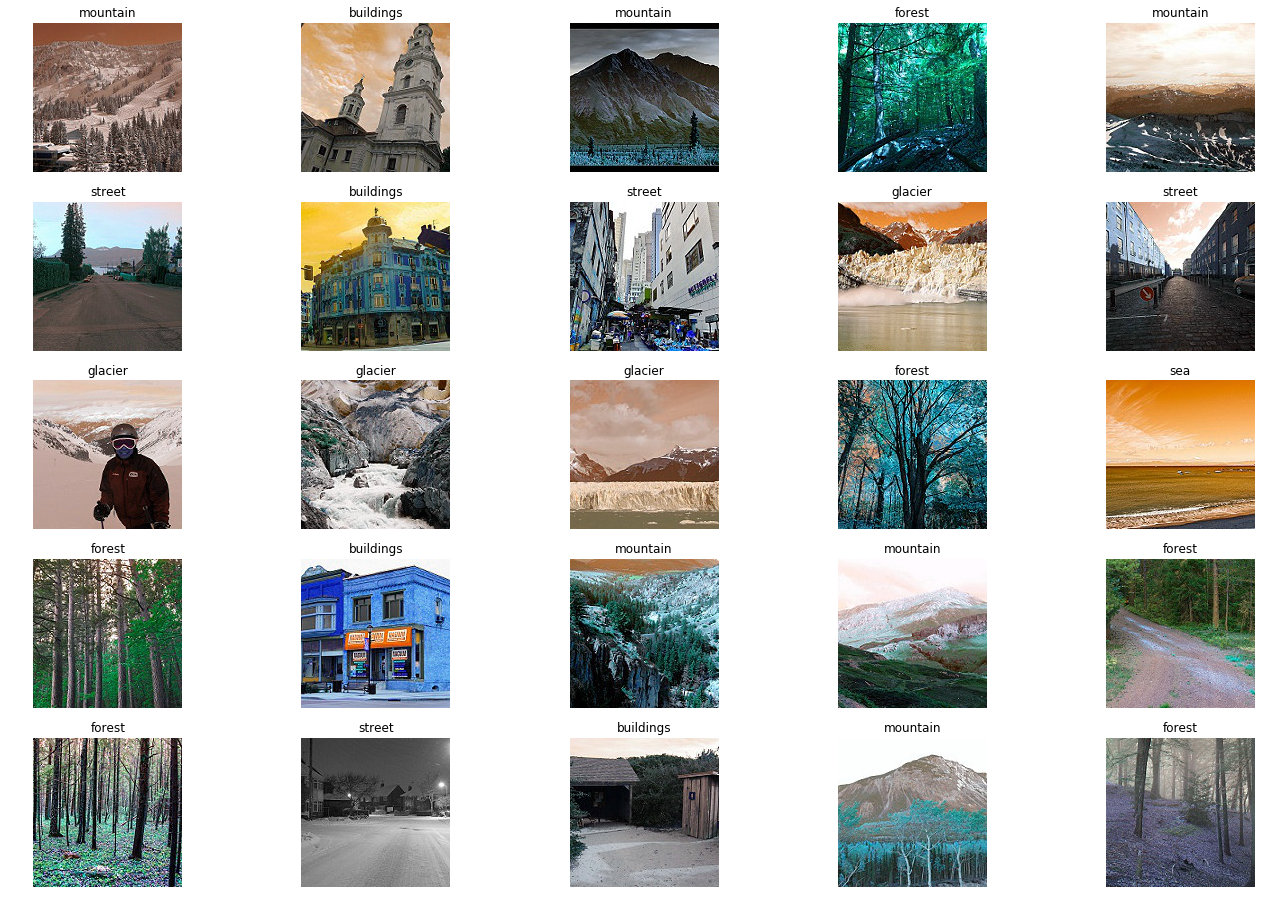

In [31]:

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    return labels[class_code]

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = random.randint(0,len(X_train))
        ax[i,j].imshow(X_train[rnd_number])
        ax[i,j].set_title(get_classlabel(y_train[rnd_number]))
        ax[i,j].axis('off')



In [76]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5), # To deal with over fitting
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])



In [77]:
model.compile(optimizer=Optimizer.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [78]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split = 0.3)

Train on 9823 samples, validate on 4211 samples
Epoch 1/10
9823/9823 [==============================] - 328s 33ms/step - loss: 1.2944 - acc: 0.4856 - val_loss: 1.0144 - val_acc: 0.6177
Epoch 2/10
9823/9823 [==============================] - 322s 33ms/step - loss: 0.9680 - acc: 0.6305 - val_loss: 0.7846 - val_acc: 0.7051
Epoch 3/10
9823/9823 [==============================] - 323s 33ms/step - loss: 0.8290 - acc: 0.6913 - val_loss: 0.8600 - val_acc: 0.6882
Epoch 4/10
9823/9823 [==============================] - 325s 33ms/step - loss: 0.7568 - acc: 0.7263 - val_loss: 0.7015 - val_acc: 0.7409
Epoch 5/10
9823/9823 [==============================] - 334s 34ms/step - loss: 0.6618 - acc: 0.7608 - val_loss: 0.6616 - val_acc: 0.7630
Epoch 6/10
9823/9823 [==============================] - 328s 33ms/step - loss: 0.6065 - acc: 0.7829 - val_loss: 0.6450 - val_acc: 0.7642
Epoch 7/10
9823/9823 [==============================] - 328s 33ms/step - loss: 0.5186 - acc: 0.8140 - val_loss: 0.6256 - val_acc: 

In [8]:
Images, Labels = get_images('./seg_test/') #Extract the training images from the folders.

X_test = np.array(Images, dtype = 'float32') #converting the list of images to numpy array.
y_test = np.array(Labels, dtype = 'int32')

X_test = X_test/(X_train.max()) #Scale data


In [79]:
score = model.evaluate(X_test, y_test, batch_size=64)

3000/3000 [==============================] - 26s 9ms/step


In [80]:
score

[5.761009667714437, 0.6380000004768371]

In [73]:
y_pred = model.predict(X_test)
y_pred =  np.argmax(y_pred, axis = 1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[321,   9,  28,   9,   6,  64],
       [  9, 447,   6,   2,   2,   8],
       [  7,   3, 508,  25,   8,   2],
       [ 10,   6, 215, 280,  11,   3],
       [ 17,   3, 223,  43, 217,   7],
       [ 60,  28,  34,   3,   3, 373]], dtype=int64)

In [74]:
print(321+447+508+280+217+373)

2146


In [75]:
2146/3000

0.7153333333333334

In [81]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.2),
   # tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5), # To deal with over fitting
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model.compile(optimizer=Optimizer.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split = 0.3)



Train on 9823 samples, validate on 4211 samples
Epoch 1/10
9823/9823 [==============================] - 234s 24ms/step - loss: 1.2367 - acc: 0.5334 - val_loss: 0.8789 - val_acc: 0.6751
Epoch 2/10
9823/9823 [==============================] - 233s 24ms/step - loss: 0.8671 - acc: 0.6781 - val_loss: 0.7640 - val_acc: 0.7188
Epoch 3/10
9823/9823 [==============================] - 233s 24ms/step - loss: 0.6972 - acc: 0.7484 - val_loss: 0.7034 - val_acc: 0.7442
Epoch 4/10
9823/9823 [==============================] - 230s 23ms/step - loss: 0.6090 - acc: 0.7800 - val_loss: 0.6994 - val_acc: 0.7504
Epoch 5/10
9823/9823 [==============================] - 230s 23ms/step - loss: 0.5136 - acc: 0.8136 - val_loss: 0.6516 - val_acc: 0.7697
Epoch 6/10
9823/9823 [==============================] - 229s 23ms/step - loss: 0.4127 - acc: 0.8549 - val_loss: 0.7334 - val_acc: 0.7476
Epoch 7/10
9823/9823 [==============================] - 229s 23ms/step - loss: 0.3364 - acc: 0.8831 - val_loss: 0.6211 - val_acc: 

In [84]:
score = model.evaluate(X_test, y_test, batch_size=64)

3000/3000 [==============================] - 20s 7ms/step


In [85]:
score

[5.274522088368734, 0.6703333334922791]